In [1]:
import pandas as pd

# retrieve data for reviews and cpi
reviews = pd.read_csv('csv_data/yelp_academic_dataset_review.csv')
price_level = pd.read_csv('csv_data/us_cpi.csv')

# sample the data
reviews = reviews.sample(frac=0.1, random_state=1)

In [2]:
# add an adjusted date column
reviews['date'] = reviews['date'].str[0:7]

# find the monthly inflation rate (in percentage) from cpi
price_level['previous_cpi'] = price_level.cpi.shift(1)
price_level = price_level.fillna(203.1)
price_level['inflation'] = 100 * (price_level['cpi'] - price_level['previous_cpi']) / price_level['cpi']

In [3]:
# find frequency of words in each review
reviews['expensive_count'] = reviews['text'].str.count('expensive')
reviews['cheap_count'] = reviews['text'].str.count('cheap')
reviews['price_count'] = reviews['text'].str.count('price')
reviews['word_count'] = len(reviews['text'].str.split())

In [4]:
# group by month and take the mean of the counts
reviews_by_month = reviews.groupby('date').sum().reset_index()

# check results
reviews_by_month

,date,stars,useful,funny,cool,expensive_count,cheap_count,price_count,word_count
0,2005-03,22.0,1.0,3.0,0.0,0.0,0.0,1.0,4893196
1,2005-04,18.0,5.0,3.0,3.0,0.0,2.0,2.0,2796112
2,2005-05,39.0,5.0,1.0,1.0,0.0,2.0,2.0,6990280
3,2005-06,9.0,1.0,1.0,2.0,0.0,0.0,0.0,1398056
4,2005-07,99.0,26.0,8.0,11.0,1.0,2.0,4.0,18174728
...,...,...,...,...,...,...,...,...,...
198,2021-09,17149.0,3762.0,1060.0,2424.0,82.0,81.0,580.0,3282635488
199,2021-10,18210.0,3223.0,853.0,1838.0,86.0,63.0,650.0,3467877908
200,2021-11,16329.0,3487.0,982.0,2292.0,79.0,67.0,528.0,3104383348
201,2021-12,17879.0,3203.0,774.0,2044.0,69.0,53.0,627.0,3370713016


In [5]:
# create a colum for frequency (in %)
reviews_by_month['words_frequency'] = 100 * (reviews_by_month['expensive_count'] + reviews_by_month['cheap_count'] + reviews_by_month['price_count']) / reviews_by_month['word_count']

# select the range of dates we want
reviews_by_month = reviews_by_month.loc[reviews_by_month['date'] >= '2007-01']
price_level = price_level[(price_level['date'] >= '2007-01') & (price_level['date'] <= '2022-01')]

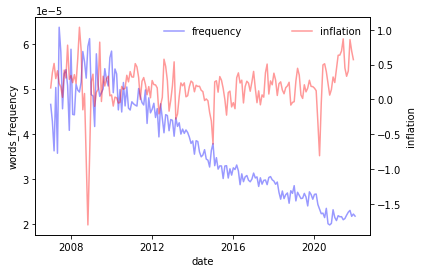

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# plot the frequency data
fig, ax1 = plt.subplots()
sns.lineplot(data=reviews_by_month, x='date', y='words_frequency', color='blue', alpha=0.4, label='frequency', ax=ax1)
plt.legend(loc='upper center', frameon=False)

# plot the inflation data
ax2 = ax1.twinx()
price_level['date'] = price_level['date'].str[0:7]
sns.lineplot(data=price_level, x='date', y='inflation', color='red', alpha=0.4, label='inflation', ax=ax2)
plt.xticks(['2008-01', '2012-01', '2016-01', '2020-01'], ['2008', '2012', '2016', '2020'])
plt.legend(loc='upper right', frameon=False)
plt.xlabel('time')

plt.savefig('figures/inflation_and_frequency.png', dpi=100)
plt.show()